## TrainingPhase and General scheduler

Creates a scheduler that lets you train a model with following different [`TrainingPhase`](/callbacks.general_sched.html#TrainingPhase).

In [ ]:
from fastai.gen_doc.nbdoc import *
from fastai.callbacks.general_sched import * 
from fastai.vision import *

In [ ]:
show_doc(TrainingPhase)

<h2 id="TrainingPhase" class="doc_header"><code>class</code> <code>TrainingPhase</code><a href="https://github.com/fastai/fastai/blob/master/fastai/callbacks/general_sched.py#L8" class="source_link" style="float:right">[source]</a><a class="source_link" data-toggle="collapse" data-target="#TrainingPhase-pytest" style="float:right; padding-right:10px">[test]</a></h2>

> <code>TrainingPhase</code>(**`length`**:`int`)

<div class="collapse" id="TrainingPhase-pytest"><div class="card card-body pytest_card"><a type="button" data-toggle="collapse" data-target="#TrainingPhase-pytest" class="close" aria-label="Close"><span aria-hidden="true">&times;</span></a><p>No tests found for <code>TrainingPhase</code>. To contribute a test please refer to <a href="/dev/test.html">this guide</a> and <a href="https://forums.fast.ai/t/improving-expanding-functional-tests/32929">this discussion</a>.</p></div></div>

Schedule hyper-parameters for a phase of `length` iterations.  

You can then schedule any hyper-parameter you want by using the following method.

In [ ]:
show_doc(TrainingPhase.schedule_hp)

<h4 id="TrainingPhase.schedule_hp" class="doc_header"><code>schedule_hp</code><a href="https://github.com/fastai/fastai/blob/master/fastai/callbacks/general_sched.py#L13" class="source_link" style="float:right">[source]</a><a class="source_link" data-toggle="collapse" data-target="#TrainingPhase-schedule_hp-pytest" style="float:right; padding-right:10px">[test]</a></h4>

> <code>schedule_hp</code>(**`name`**, **`vals`**, **`anneal`**=***`None`***)

<div class="collapse" id="TrainingPhase-schedule_hp-pytest"><div class="card card-body pytest_card"><a type="button" data-toggle="collapse" data-target="#TrainingPhase-schedule_hp-pytest" class="close" aria-label="Close"><span aria-hidden="true">&times;</span></a><p>No tests found for <code>schedule_hp</code>. To contribute a test please refer to <a href="/dev/test.html">this guide</a> and <a href="https://forums.fast.ai/t/improving-expanding-functional-tests/32929">this discussion</a>.</p></div></div>

Adds a schedule for `name` between `vals` using `anneal`.  

The phase will make the hyper-parameter vary from the first value in `vals` to the second, following `anneal`. If an annealing function is specified but `vals` is a float, it will decay to 0. If no annealing function is specified, the default is a linear annealing for a tuple, a constant parameter if it's a float. 

In [ ]:
jekyll_note("""If you want to use discriminative values, you can pass an numpy array in `vals` (or a tuple
of them for start and stop).""")

<div markdown="span" class="alert alert-info" role="alert"><i class="fa fa-info-circle"></i> <b>Note: </b>If you want to use discriminative values, you can pass an numpy array in `vals` (or a tuple
of them for start and stop).</div>

The basic hyper-parameters are named:
- 'lr' for learning rate
- 'mom' for momentum (or beta1 in Adam)
- 'beta' for the beta2 in Adam or the alpha in RMSprop
- 'wd' for weight decay

You can also add any hyper-parameter that is in your optimizer (even if it's custom or a [`GeneralOptimizer`](/general_optimizer.html#GeneralOptimizer)), like 'eps' if you're using Adam.  

Let's make an example by using this to code [SGD with warm restarts](https://arxiv.org/abs/1608.03983).

In [ ]:
def fit_sgd_warm(learn, n_cycles, lr, mom, cycle_len, cycle_mult):
    n = len(learn.data.train_dl)
    phases = [(TrainingPhase(n * (cycle_len * cycle_mult**i))
                 .schedule_hp('lr', lr, anneal=annealing_cos)
                 .schedule_hp('mom', mom)) for i in range(n_cycles)]
    sched = GeneralScheduler(learn, phases)
    learn.callbacks.append(sched)
    if cycle_mult != 1:
        total_epochs = int(cycle_len * (1 - (cycle_mult)**n_cycles)/(1-cycle_mult)) 
    else: total_epochs = n_cycles * cycle_len
    learn.fit(total_epochs)

In [ ]:
path = untar_data(URLs.MNIST_SAMPLE)
data = ImageDataBunch.from_folder(path)
learn = Learner(data, simple_cnn((3,16,16,2)), metrics=accuracy)
fit_sgd_warm(learn, 3, 1e-3, 0.9, 1, 2)

epoch,train_loss,valid_loss,accuracy,time
0,0.162146,0.153532,0.942100,00:02
1,0.126112,0.117267,0.960255,00:02
2,0.112045,0.110586,0.962218,00:02
3,0.097603,0.090838,0.967615,00:02
4,0.086883,0.081375,0.973013,00:02
5,0.083673,0.076160,0.973994,00:02
6,0.084835,0.076211,0.973994,00:02


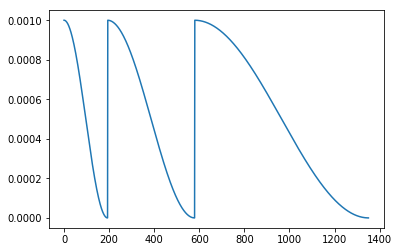

In [ ]:
learn.recorder.plot_lr()

In [ ]:
show_doc(GeneralScheduler)

<h2 id="GeneralScheduler" class="doc_header"><code>class</code> <code>GeneralScheduler</code><a href="https://github.com/fastai/fastai/blob/master/fastai/callbacks/general_sched.py#L18" class="source_link" style="float:right">[source]</a><a class="source_link" data-toggle="collapse" data-target="#GeneralScheduler-pytest" style="float:right; padding-right:10px">[test]</a></h2>

> <code>GeneralScheduler</code>(**`learn`**:[`Learner`](/basic_train.html#Learner), **`phases`**:`Collection`\[[`TrainingPhase`](/callbacks.general_sched.html#TrainingPhase)\], **`start_epoch`**:`int`=***`None`***) :: [`LearnerCallback`](/basic_train.html#LearnerCallback)

<div class="collapse" id="GeneralScheduler-pytest"><div class="card card-body pytest_card"><a type="button" data-toggle="collapse" data-target="#GeneralScheduler-pytest" class="close" aria-label="Close"><span aria-hidden="true">&times;</span></a><p>No tests found for <code>GeneralScheduler</code>. To contribute a test please refer to <a href="/dev/test.html">this guide</a> and <a href="https://forums.fast.ai/t/improving-expanding-functional-tests/32929">this discussion</a>.</p></div></div>

Schedule multiple [`TrainingPhase`](/callbacks.general_sched.html#TrainingPhase) for a [`Learner`](/basic_train.html#Learner).  

### Callback methods

You don't call these yourself - they're called by fastai's [`Callback`](/callback.html#Callback) system automatically to enable the class's functionality.

In [ ]:
show_doc(GeneralScheduler.on_batch_end, doc_string=False)

<h4 id="GeneralScheduler.on_batch_end" class="doc_header"><code>on_batch_end</code><a href="https://github.com/fastai/fastai/blob/master/fastai/callbacks/general_sched.py#L40" class="source_link" style="float:right">[source]</a><a class="source_link" data-toggle="collapse" data-target="#GeneralScheduler-on_batch_end-pytest" style="float:right; padding-right:10px">[test]</a></h4>

> <code>on_batch_end</code>(**`train`**, **\*\*`kwargs`**:`Any`)

<div class="collapse" id="GeneralScheduler-on_batch_end-pytest"><div class="card card-body pytest_card"><a type="button" data-toggle="collapse" data-target="#GeneralScheduler-on_batch_end-pytest" class="close" aria-label="Close"><span aria-hidden="true">&times;</span></a><p>No tests found for <code>on_batch_end</code>. To contribute a test please refer to <a href="/dev/test.html">this guide</a> and <a href="https://forums.fast.ai/t/improving-expanding-functional-tests/32929">this discussion</a>.</p></div></div>

Takes a step in the current phase and prepare the hyperparameters for the next batch.

In [ ]:
show_doc(GeneralScheduler.on_train_begin, doc_string=False)

<h4 id="GeneralScheduler.on_train_begin" class="doc_header"><code>on_train_begin</code><a href="https://github.com/fastai/fastai/blob/master/fastai/callbacks/general_sched.py#L24" class="source_link" style="float:right">[source]</a><a class="source_link" data-toggle="collapse" data-target="#GeneralScheduler-on_train_begin-pytest" style="float:right; padding-right:10px">[test]</a></h4>

> <code>on_train_begin</code>(**`epoch`**:`int`, **\*\*`kwargs`**:`Any`)

<div class="collapse" id="GeneralScheduler-on_train_begin-pytest"><div class="card card-body pytest_card"><a type="button" data-toggle="collapse" data-target="#GeneralScheduler-on_train_begin-pytest" class="close" aria-label="Close"><span aria-hidden="true">&times;</span></a><p>No tests found for <code>on_train_begin</code>. To contribute a test please refer to <a href="/dev/test.html">this guide</a> and <a href="https://forums.fast.ai/t/improving-expanding-functional-tests/32929">this discussion</a>.</p></div></div>

Initiates the hyperparameters to the start values of the first phase. 

## Undocumented Methods - Methods moved below this line will intentionally be hidden